In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE



In [10]:
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)

In [11]:
# Discard all cryptocurrencies that are not being traded
trading_df = df[df['IsTrading']== True]

In [12]:
# Remove all rows that have at least one null value.
trading_df = trading_df.dropna()

In [13]:
# drop the IsTrading column from the dataframe
trading_df = trading_df.drop(['IsTrading'],axis=1)
trading_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [14]:
# Filter for cryptocurrencies that have been mined.
trading_df = trading_df[trading_df['TotalCoinsMined']>0]
trading_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [15]:
coinName = trading_df["CoinName"]
trading_f = trading_df.drop("CoinName", axis=1)
trading_f.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [16]:
coinName

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [17]:
X_dummies = pd.get_dummies(trading_f)
# print(X_dummies.columns)
X_dummies.head()

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)

In [20]:
X_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, 23.04343724, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [21]:
pca = PCA(n_components=0.99)

# Get two principal components for the data.
crypto_pca = pca.fit_transform(X_scaled)

In [22]:
crypto_pca

array([[-3.06477939e-01, -1.34247908e-01,  1.08023215e-13, ...,
        -7.83783960e-17, -7.93839620e-17,  2.58922359e-17],
       [-2.86778846e-01, -1.35377776e-01,  1.08157751e-13, ...,
         3.82486891e-15,  3.91875748e-17,  2.04959679e-15],
       [ 3.61159332e-01, -3.30370547e-03,  1.24098918e-14, ...,
        -1.92867894e-15, -5.12541265e-15, -5.50029274e-15],
       ...,
       [-7.65577452e-02, -3.59257919e-01,  2.95673773e-13, ...,
         2.31284547e-15, -3.18391714e-15, -5.56684883e-15],
       [-3.33346596e-01, -2.83921333e-01,  2.22805164e-13, ...,
         5.26433983e-01,  2.09505750e+00, -8.55094655e-01],
       [-2.28738656e-01, -7.19874552e-02,  5.77265281e-14, ...,
        -1.79483217e-02,  9.10382024e-02, -5.44038429e-02]])

In [23]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(crypto_pca)

In [24]:
trading_f['x'] = transformed_features[:,0]
trading_f['y'] = transformed_features[:,1]
# trading_f['class'] = coinName

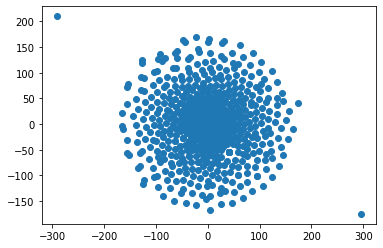

In [25]:
plt.scatter(trading_f['x'], trading_f['y'])
plt.show()

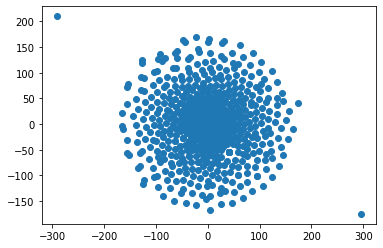

In [27]:
# plt.scatter(trading_f['x'], trading_f['y'], c=trading_f['class'])
plt.scatter(trading_f['x'], trading_f['y'])
plt.show()